In [12]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('train.csv')
print(df.shape)
print(df.count())
print(df.describe())

(891, 12)
PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64
       PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.

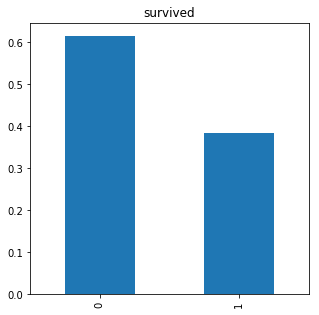

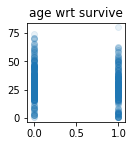

In [60]:
#percentage ofpeople survived or not.
fig  = plt.figure(figsize=(5,5))
df.Survived.value_counts(normalize=True).plot(kind = "bar",alpha = 1)
plt.title("survived")
plt.show()
#realtion b'ween age and survived
plt.subplot2grid((2,3),(0,1))
plt.scatter(df.Survived,df.Age,alpha=0.1)
plt.title("age wrt survive")
plt.show()

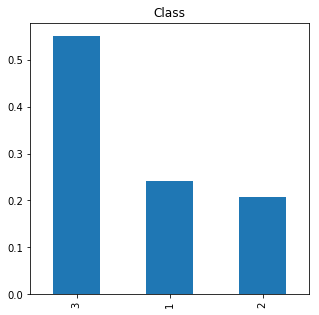

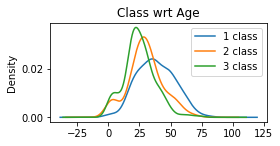

In [15]:
#realtion b'ween class
fig  = plt.figure(figsize=(5,5))
df.Pclass.value_counts(normalize=True).plot(kind = "bar",alpha = 1)
plt.title("Class")
plt.show()

#realtion b'ween Class and age
plt.subplot2grid((2,3),(1,0),colspan=2)
for x in [1,2,3]:
  df.Age[df.Pclass == x].plot(kind = "kde")
plt.title("Class wrt Age")
plt.legend(("1 class","2 class","3 class"))
plt.show()

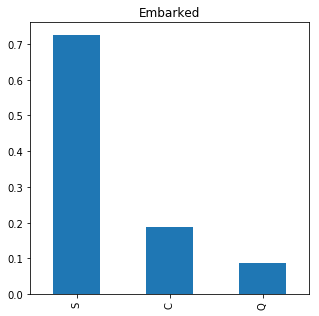

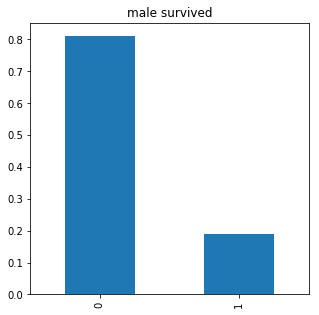

In [19]:
#embarked
fig  = plt.figure(figsize=(5,5))
df.Embarked.value_counts(normalize=True).plot(kind = "bar",alpha = 1)
plt.title("Embarked")
plt.show()

#gender
fig  = plt.figure(figsize=(5,5))
df.Survived[df.Sex == 'male'].value_counts(normalize=True).plot(kind = "bar",alpha = 1)
plt.title("male survived")
plt.show()

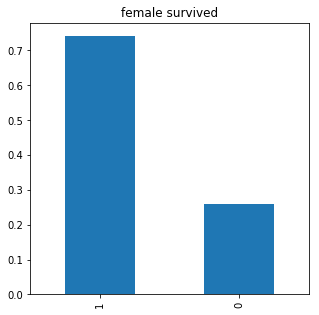

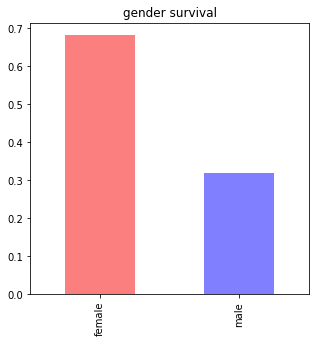

In [24]:
#gender
fig  = plt.figure(figsize=(5,5))
df.Survived[df.Sex == 'female'].value_counts(normalize=True).plot(kind = "bar",alpha = 1)
plt.title("female survived")
plt.show()


#both gender
fig  = plt.figure(figsize=(5,5))
df.Sex[df.Survived == 1].value_counts(normalize=True).plot(kind = "bar",alpha = 0.5,color = ["#FA0000",'b'])
plt.title("gender survival")
plt.show()


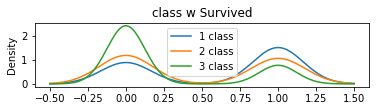

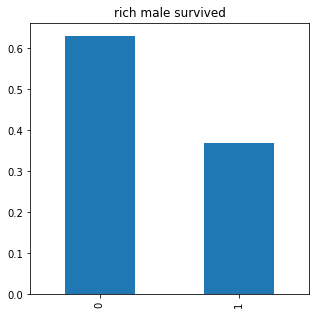

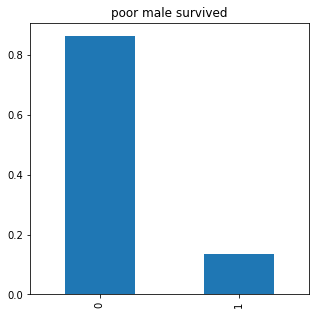

In [63]:
#kde class wrt survived
plt.subplot2grid((3,4),(1,0),colspan=4)
for x in [1,2,3]:
  df.Survived[df.Pclass == x].plot(kind = "kde")
plt.title("class w Survived")
plt.legend(("1 class","2 class","3 class"))
plt.show()



#
fig  = plt.figure(figsize=(5,5))
df.Survived[(df.Sex =='male') &( df.Pclass==1 )].value_counts(normalize=True).plot(kind = "bar",alpha = 1)
plt.title("rich male survived")
plt.show()

#
fig  = plt.figure(figsize=(5,5))
df.Survived[(df.Sex =='male') &( df.Pclass==3 )].value_counts(normalize=True).plot(kind = "bar",alpha = 1)
plt.title("poor male survived")
plt.show()



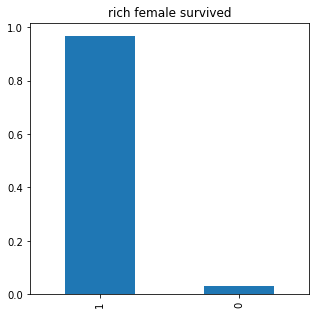

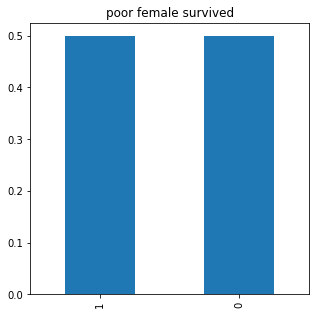

In [62]:
#
fig  = plt.figure(figsize=(5,5))
df.Survived[(df.Sex =='female') &( df.Pclass==1 )].value_counts(normalize=True).plot(kind = "bar",alpha = 1)
plt.title("rich female survived")
plt.show()

#
fig  = plt.figure(figsize=(5,5))
df.Survived[(df.Sex =='female') &( df.Pclass==3 )].value_counts(normalize=True).plot(kind = "bar",alpha = 1)
plt.title("poor female survived")
plt.show()



*   **Split dependent and independent variables**
*   **Deal with missiing values using Imputer**


*   **Label Encode Categorical Data**






In [64]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Data = pd.read_csv("train.csv")
X = Data[['Pclass','Sex','Age','SibSp','Parch','Fare']]
y = Data[['Survived']]


# dealing with missing values

from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(X[['Age']])
X[['Age']] = imputer.transform(X[['Age']])


#dealing with categorical features

from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[['Sex']] = labelencoder_X.fit_transform(X[['Sex']])


#test set (g1)

Data1 = pd.read_csv("test.csv")
g1 = Data1[['Pclass','Sex','Age','SibSp','Parch','Fare']]


# dealing with missing values

from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(g1[['Age']])
g1[['Age']] = imputer.transform(g1[['Age']])


#dealing with categorical features

from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
g1[['Sex']] = labelencoder_X.fit_transform(g1[['Sex']])
print(g1)


# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
g1 = sc.transform(g1)

print(g1)


     Pclass  Sex       Age  SibSp  Parch      Fare
0         3    1  34.50000      0      0    7.8292
1         3    0  47.00000      1      0    7.0000
2         2    1  62.00000      0      0    9.6875
3         3    1  27.00000      0      0    8.6625
4         3    0  22.00000      1      1   12.2875
5         3    1  14.00000      0      0    9.2250
6         3    0  30.00000      0      0    7.6292
7         2    1  26.00000      1      1   29.0000
8         3    0  18.00000      0      0    7.2292
9         3    1  21.00000      2      0   24.1500
10        3    1  30.27259      0      0    7.8958
11        1    1  46.00000      0      0   26.0000
12        1    0  23.00000      1      0   82.2667
13        2    1  63.00000      1      0   26.0000
14        1    0  47.00000      1      0   61.1750
15        2    0  24.00000      1      0   27.7208
16        2    1  35.00000      0      0   12.3500
17        3    1  21.00000      0      0    7.2250
18        3    0  27.00000     



*   **Apply Decision tree for prediction**
*   **Evaluate with Grid Search**







In [65]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X, y)

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
hyperparams = [{'C':[1,10,100],'kernel':['linear']},{'C':[1,10,100],'kernel':['rbf'],'gamma':[0.05,0.04,0.03,0.01]}]
gridsearch = GridSearchCV(estimator=classifier,  
                     param_grid=hyperparams,
                     scoring='accuracy',
                     cv=10)
gridsearch=gridsearch.fit(X,y) 
best_result = gridsearch.best_score_
best_parameters = gridsearch.best_params_
print(best_result)
print(best_parameters)


0.8282828282828283
{'C': 10, 'gamma': 0.04, 'kernel': 'rbf'}
